In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("Student_List.csv")

In [4]:
print(data.head())

   StudentID  Age ParentalEducation  StudyTimeWeekly  Absences Tutoring  \
0       1640   18      Some College        10.318918         5       No   
1       2939   16        Bachelor's         6.517803         2      Yes   
2       2877   15      Some College         0.815700         1       No   
3       1628   16       High School         6.304335         8       No   
4       2052   15      Some College         2.516047        14      Yes   

   ParentalSupport Extracurricular Sports Music Volunteering       GPA  \
0                2              No    Yes    No           No  2.655994   
1                2              No    Yes    No           No  3.474562   
2                1              No     No   Yes          Yes  2.806878   
3                3              No     No    No           No  2.150546   
4                3             Yes     No    No           No  2.253871   

  GradeClass  
0          C  
1          B  
2          C  
3          D  
4          D  


In [5]:
data["StudentID"].nunique()

1500

In [6]:
len(data)

1500

In [7]:
(data["Age"].max(), data["Age"].min())

(18, 15)

In [8]:
(data["ParentalSupport"].max(), data["ParentalSupport"].min())

(4, 0)

In [9]:
data["GradeClass"].value_counts(normalize = True) * 100

GradeClass
F    51.000000
D    16.533333
C    16.266667
B    12.200000
A     4.000000
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0xd240f20>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'F'),
  Text(-0.9187552060045093, -0.604887486595327, 'D'),
  Text(0.04606312374895914, -1.0990351171052217, 'C'),
  Text(0.8858386140790542, -0.6521425839542305, 'B'),
  Text(1.0913261589251626, -0.13786665603274467, 'A')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(-0.5011392032751868, -0.3299386290519965, '16.5%'),
  Text(0.025125340226704984, -0.5994737002392118, '16.3%'),
  Text(0.48318469858857493, -0.35571413670230756, '12.2%'),
  Text(0.5952688139591795, -0.0751999941996789, '4.0%')])

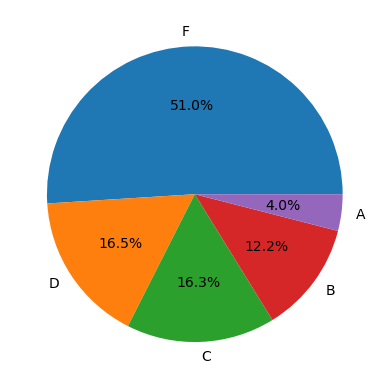

In [10]:
gradeData = data["GradeClass"].value_counts(normalize = True) * 100
plt.pie(gradeData, labels = gradeData.index,  autopct='%1.1f%%')

In [11]:
data["ParentalEducation"].value_counts()

ParentalEducation
Some College    577
High School     458
Bachelor's      234
No Education    154
Higher           77
Name: count, dtype: int64

In [12]:
data["ParentalEducation"] = data["ParentalEducation"].replace(
    {"No Education": 0, "High School": 1, "Some College": 2, "Bachelor's": 3, "Higher": 4})

C:\Users\TechFast Australia\AppData\Local\Temp\ipykernel_20240\1371849869.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["ParentalEducation"] = data["ParentalEducation"].replace(


In [13]:
data.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,2,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,3,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,2,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,1,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,2,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


Text(0.5, 1.0, 'Student GPA by Parental Education')

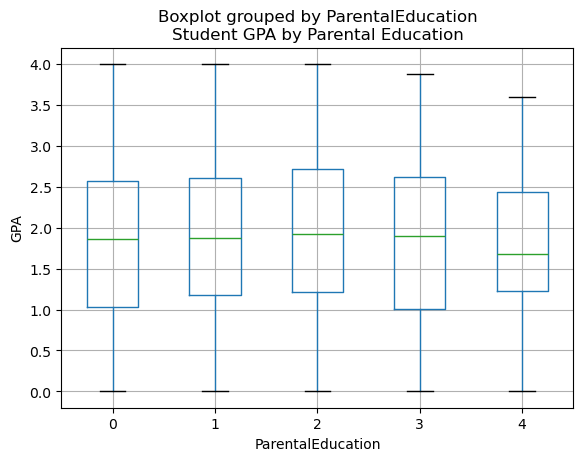

In [14]:
data.boxplot(column = "GPA", by = "ParentalEducation")
plt.ylabel("GPA")
plt.title("Student GPA by Parental Education")

Text(0.5, 0, 'GPA')

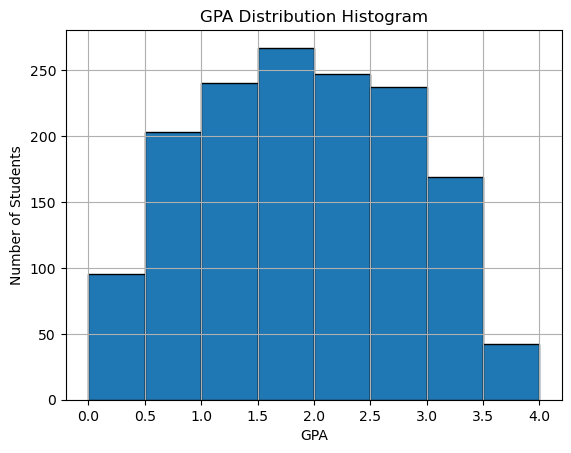

In [15]:
data["GPA"].hist(edgecolor = "black", bins = 8)
plt.title("GPA Distribution Histogram")
plt.ylabel("Number of Students")
plt.xlabel("GPA")

0.1904931303711251

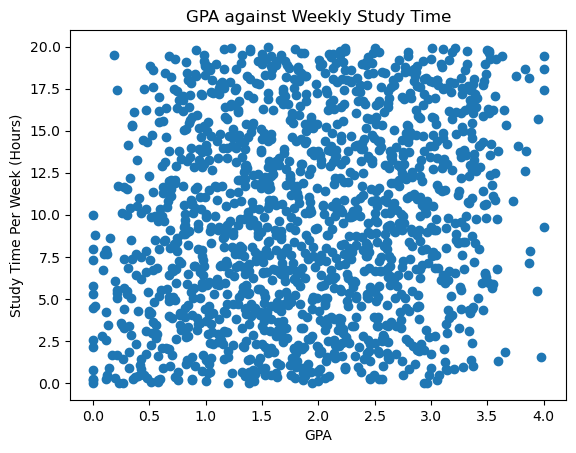

In [16]:
plt.scatter(data["GPA"], data["StudyTimeWeekly"])
plt.xlabel("GPA")
plt.ylabel("Study Time Per Week (Hours)")
plt.title("GPA against Weekly Study Time")
data["GPA"].corr(data["StudyTimeWeekly"])

-0.9194876943290947

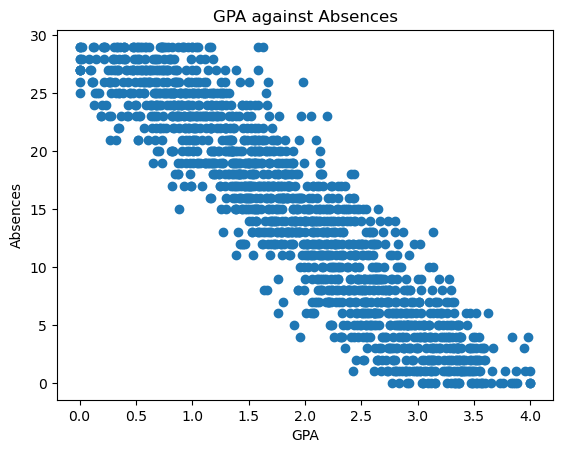

In [17]:
plt.scatter(data["GPA"], data["Absences"])
plt.xlabel("GPA")
plt.ylabel("Absences")
plt.title("GPA against Absences")
data["GPA"].corr(data["Absences"])

In [18]:
groupA = data[
(data["Extracurricular"] == "Yes") & 
(data["Sports"] == "Yes") & 
(data["Music"] == "Yes") & 
(data["Volunteering"] == "Yes")]
groupA.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
106,2323,15,2,3.402855,4,No,1,Yes,Yes,Yes,Yes,2.517229,C
189,1838,15,3,4.424756,21,Yes,2,Yes,Yes,Yes,Yes,1.943573,F
710,2981,15,2,18.652914,27,Yes,4,Yes,Yes,Yes,Yes,1.585820,F
733,2204,16,3,8.468776,8,Yes,2,Yes,Yes,Yes,Yes,2.901186,C
1449,1448,16,2,13.812455,3,No,3,Yes,Yes,Yes,Yes,3.289823,B


In [19]:
groupB = data[
(data["Extracurricular"] == "No") & 
(data["Sports"] == "No") & 
(data["Music"] == "No") & 
(data["Volunteering"] == "No")]
groupB.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
3,1628,16,1,6.304335,8,No,3,No,No,No,No,2.150546,D
6,2555,18,2,3.521786,22,No,4,No,No,No,No,0.935779,F
7,2513,15,1,4.459000,27,No,1,No,No,No,No,0.000000,F
8,2811,16,2,7.520836,5,No,0,No,No,No,No,2.631368,C
11,1220,17,1,1.232160,17,No,3,No,No,No,No,1.465549,F


In [20]:
groupA["GPA"].mean()

2.4475262217999996

In [21]:
groupB["GPA"].mean()

1.7312226005532407

In [22]:
len(groupA)

5

In [23]:
len(groupB)

432

In [24]:
aggData = data.groupby("ParentalSupport").agg({
    "GPA": ["mean", "median"], 
    "Age": lambda x: (x == 18).sum()}).reset_index()
aggData.rename(
    columns = {
        "": "Parental Support Level",
        "mean": "Mean GPA",
        "median": "Median GPA",
        "<lambda>": "18 Year Old Students"},
        inplace = True
)
aggData.columns = aggData.columns.droplevel(0)
aggData

,Parental Support Level,Mean GPA,Median GPA,18 Year Old Students
0,0,1.521602,1.471672,33
1,1,1.735855,1.740455,80
2,2,1.845914,1.817007,98
3,3,2.068174,2.070669,116
4,4,2.227639,2.215516,35


In [25]:
aggData["Parental Support Level"] = aggData["Parental Support Level"].map({
    0: "None",
    1: "Low",
    2: "Moderate",
    3: "High",
    4: "Very High",})

aggData.set_index("Parental Support Level", inplace = True)

In [26]:
aggData

,Mean GPA,Median GPA,18 Year Old Students
Parental Support Level,,,
None,1.521602,1.471672,33
Low,1.735855,1.740455,80
Moderate,1.845914,1.817007,98
High,2.068174,2.070669,116
Very High,2.227639,2.215516,35


Text(0, 0.5, 'GPA')

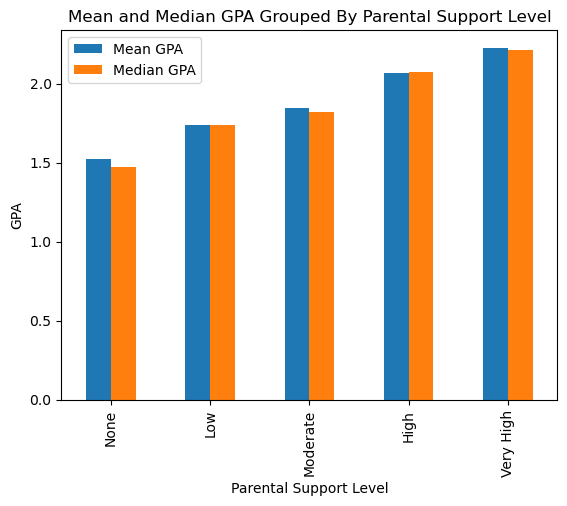

In [27]:
ax = aggData[["Mean GPA", "Median GPA"]].plot(kind = "bar")
ax.set_title("Mean and Median GPA Grouped By Parental Support Level")
ax.set_ylabel("GPA")

In [28]:
tutorData = data.groupby("Tutoring").agg({
    "GPA": ["mean", "median"]}).reset_index()
tutorData.rename(
    columns = {
        "": "Tutoring",
        "mean": "Mean GPA",
        "median": "Median GPA"},
        inplace = True
    )
tutorData.columns = tutorData.columns.droplevel(0)

In [29]:
tutorData

,Tutoring,Mean GPA,Median GPA
0,No,1.804967,1.785052
1,Yes,2.123106,2.137124


In [30]:
tutorData.set_index("Tutoring", inplace = True)

Text(0, 0.5, 'GPA')

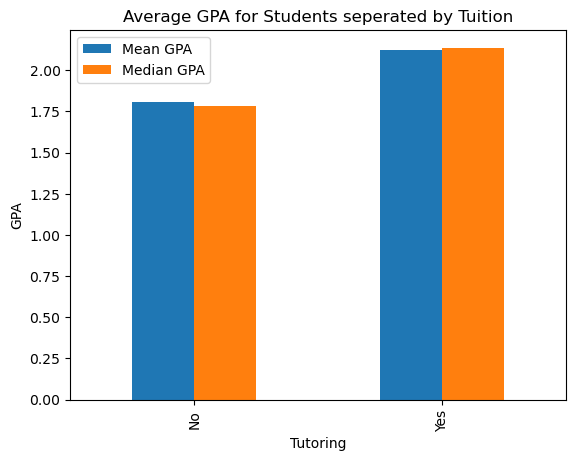

In [31]:
ax = tutorData.plot(kind = "bar")
ax.set_title("Average GPA for Students seperated by Tuition")
ax.set_ylabel("GPA")